# Mervar - Kohonen Maps
### Alexander Mervar
### Professor Brown
### COGS-Q 355 SP22
### 2.9.2022

Consider a Kohonen self organizing feature map (SOFM), as described in Kohonen (1982). Consider a map with 2500 elements arranged in a 50x50 rectangular grid (matrix). Each input vector has 3 elements in the continuous range of [0,1] that correspond to a signal of one of the primary colors (red, green, blue). For example, (1, 0, 0) is an input pattern that corresponds to the color red.

Implement a simple SOFM in python following the equations described in Kohonen (1982), but simplified as follows. Assume a weight matrix W of dimensions 50x50x3, that connects each input to each SOFM unit. The input to each SOFM unit is the external input plus the lateral input:
- External Input = W * inputs (Equation 4 in Kohonen (1982))
- Activity from A (from perspective of B):
  - a * 8 ; If euclidean distance is between A and B < 3
  - a * -1 ; if euclidean distance is between A and B is > 3 < 8
  - 0 otherwise
- The total activity $\eta$ ("eta") of each SOFM is a piece-wise sigmoid
  - 0 if the sum of the external and lateral input is <= 0
  - 5 if the sum of the external and lateral input is >= 5
  - The sum of the external and lateral input, otherwise
- Weights W from the external inputs to the SOFM units are adjusted by the following rule
  - W(t+1) = (W(t) + learning*eta*inputs)/(the euclidean length of the input weights to the SOFM unit)
  - learning = 0.01

KeyboardInterrupt: 

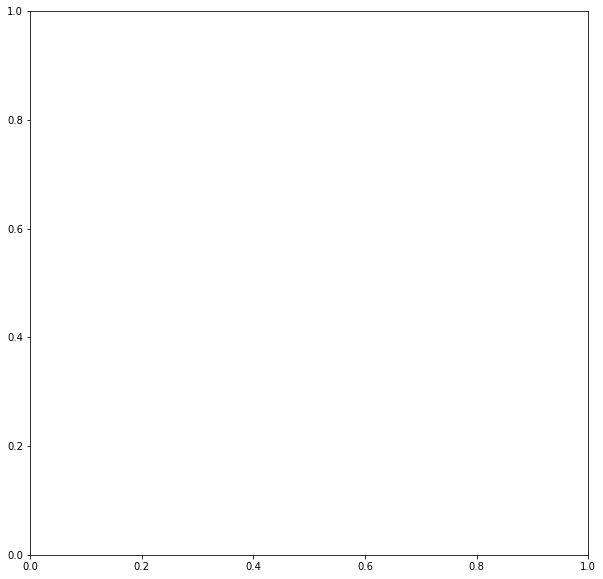

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import colors

fig, ax = plt.subplots(figsize=(10,10))

# Define Learning Rate
learningRate = 0.01

# Define weight matrix size
# TODO: Change to fit assignment
xSize = 50
ySize = 50
weightVectorSize = 3
mapSize = xSize

# Define Frequency of Input Vectors
# TODO: Change to fit assignment
redFrequency = 1/3
greenFrequency = 2/3
blueFrequency  = 0

# Define the number of iterations
# TODO: Change to fit assignment
iterations = 1


# Define an random X*Y*WV array
weightMatrix = np.random.random((xSize, ySize, weightVectorSize))

for i in range(iterations):
    # Define a random input vector
    inputVectorSelector = random.random()

    # Create input vector
    if inputVectorSelector < redFrequency:
        inputVector = np.array([1, 0, 0])
    elif inputVectorSelector < redFrequency + greenFrequency:
        inputVector = np.array([0, 1, 0])
    else:
        inputVector = np.array([0, 0, 1])

    # Traverse the matrix
    for j in range(xSize):
        for k in range(ySize):
            # Select the SOFM Unit
            selectedUnit = weightMatrix[j,k]

            # Calculate the external input (The dot product of the input vector and the weight vector)
            externalInput = np.dot(inputVector, selectedUnit)

            tmp = externalInput

            # Traverse to every other unit
            for l in range(xSize):
                for m in range(ySize):
                    if (i == l & j == m):
                        continue
                    else:
                        # TODO: Fix wrap around mechanic
                        # Select a new SOFM Unit
                        # xval and yval are the coordinates of the current units
                        for p in range(-8,8):
                            for q in range(-8,8):
                                # TODO: What is this?
                                # edist = np.sqrt(p**2 + q**2)
                                modx = np.mod(j + p, mapSize)
                                mody = np.mod(k + q, mapSize)
                                otherUnit = weightMatrix[modx, mody]

                                # Calculate lateral input
                                if (np.dot(inputVector, otherUnit) < 3):
                                    lateralInput = np.dot(inputVector, otherUnit) * 8
                                elif (3 > np.dot(inputVector, otherUnit) < 8):
                                    lateralInput = np.dot(inputVector, otherUnit) * -1
                                else:
                                    lateralInput = 0

                                # Add both the external inputs and neighbor inputs into a new variable
                                tmp += lateralInput
                        
            # Calcualte eta for tmp
            if (tmp <= 0):
                eta = 0
            elif (tmp >= 5):
                eta = 5
            else:
                eta = tmp

            # Calculate the new weight vector for the selected unit
            weightMatrix[j,k] = (selectedUnit + (learningRate * eta * inputVector))/np.linalg.norm(inputVector - selectedUnit)

# Produce an Image
plt.imshow(weightMatrix)

plt.show()

ax.set_title("Mervar Kohonen Map")

fig.canvas.draw()

fig.canvas.flush_events()